<a href="https://colab.research.google.com/github/SaraivaDB/Elbow-Method/blob/main/Machine_Learning_para_Classifica%C3%A7%C3%A3o_de_requisitos_Funcionais_e_N%C3%A3o_Funcionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn nltk pandas

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving normalized.csv to normalized.csv


In [ ]:
normalized = pd.read_csv('/content/normalized.csv')

In [ ]:
frequencias = normalized['_class_'].value_counts()

print(frequencias)

_class_
F     444
SE    125
US     85
O      77
PE     67
LF     49
A      31
MN     24
SC     22
FT     18
L      15
PO     12
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Criar nova coluna 'new_class' com 'F' e 'NF'
normalized['new_class'] = normalized['_class_'].apply(lambda x: 'F' if x == 'F' else 'NF')

# Exibir o DataFrame para verificar o resultado
frequencias = normalized['new_class'].value_counts()

print(frequencias)

new_class
NF    525
F     444
Name: count, dtype: int64


In [ ]:
normalized.head()

,RequirementText,_class_,new_class
0,system shall refresh display every second,PE,NF
1,application shall match color schema set forth...,LF,NF
2,project data must readable projection screen v...,US,NF
3,product shall available normal business hour l...,A,NF
4,project data must understandable projection sc...,US,NF


In [ ]:
!pip install "dask[dataframe]"
!pip install catboost
!pip install lightgbm
!pip install xgboost

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, precision_score, recall_score


# Para usar XGBoost, LightGBM e CatBoost, certifique-se de que estão instalados:
# pip install xgboost lightgbm catboost

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Exemplo de dados fictícios
data = {
    'RequirementText': [
        'system shall refresh display every second',
        'application shall match color schema set forth...',
        'project data must be readable on projection screen...',
        'product shall be available during normal business hours...'
    ],
    'new_class': ['NF', 'NF', 'NF', 'F']  # Adicionado um exemplo de classe 'F'
}

# Carregar os dados em um DataFrame
df = normalized # pd.DataFrame(data)

# Features (X) e labels (y)
X = df['RequirementText']
y = df['new_class']

# Converter o texto para vetores numéricos usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Codificar as classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lista de classificadores para testar
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MLP (Neural Network)': MLPClassifier(),
    'Bagging': BaggingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # verbose=0 para silenciar a saída
}

# Loop para treinar e validar cada classificador
results = {}
for name, clf in classifiers.items():
    print(f"Treinando e avaliando {name}...")

    try:
        # Verifica se o classificador é um que requer matriz densa
        if name in ['Gaussian Naive Bayes', 'Quadratic Discriminant Analysis', 'Linear Discriminant Analysis']:
            # Converte para array denso
            scores = cross_val_score(clf, X_vectorized.toarray(), y_encoded, cv=5)
        else:
            # Mantém a matriz esparsa
            scores = cross_val_score(clf, X_vectorized, y_encoded, cv=5)

        results[name] = scores.mean()
        print(f"{name} - Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    except Exception as e:
        print(f"Erro ao treinar {name}: {str(e)}")

Treinando e avaliando Naive Bayes...
Naive Bayes - Accuracy: 0.75 (+/- 0.07)
Treinando e avaliando Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.64 (+/- 0.05)
Treinando e avaliando SVM...
SVM - Accuracy: 0.69 (+/- 0.09)
Treinando e avaliando Decision Tree...
Decision Tree - Accuracy: 0.62 (+/- 0.07)
Treinando e avaliando Random Forest...
Random Forest - Accuracy: 0.67 (+/- 0.09)
Treinando e avaliando Logistic Regression...
Logistic Regression - Accuracy: 0.69 (+/- 0.09)
Treinando e avaliando KNN...
KNN - Accuracy: 0.68 (+/- 0.02)
Treinando e avaliando Gradient Boosting...
Gradient Boosting - Accuracy: 0.66 (+/- 0.08)
Treinando e avaliando AdaBoost...
AdaBoost - Accuracy: 0.65 (+/- 0.05)
Treinando e avaliando Extra Trees...
Extra Trees - Accuracy: 0.70 (+/- 0.09)
Treinando e avaliando MLP (Neural Network)...
MLP (Neural Network) - Accuracy: 0.69 (+/- 0.06)
Treinando e avaliando Bagging...
Bagging - Accuracy: 0.64 (+/- 0.08)
Treinando e avaliando Linear Discriminant Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis - Accuracy: 0.52 (+/- 0.05)
Treinando e avaliando XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:21:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Accuracy: 0.63 (+/- 0.06)
Treinando e avaliando LightGBM...
[LightGBM] [Info] Number of positive: 420, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 775, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541935 -> initscore=0.168137
[LightGBM] [Info] Start training from score 0.168137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
# Ordenar os resultados do melhor para o pior
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nClassificadores ordenados por desempenho:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.2f}")

# Identificar o classificador com melhor desempenho
best_classifier = sorted_results[0]
print(f"\nO melhor classificador é {best_classifier[0]} com uma precisão média de {best_classifier[1]:.2f}")


Classificadores ordenados por desempenho:
Naive Bayes: 0.75
Extra Trees: 0.70
Logistic Regression: 0.69
MLP (Neural Network): 0.69
SVM: 0.69
KNN: 0.68
CatBoost: 0.68
Random Forest: 0.67
Gradient Boosting: 0.66
AdaBoost: 0.65
LightGBM: 0.64
Gaussian Naive Bayes: 0.64
Bagging: 0.64
XGBoost: 0.63
Decision Tree: 0.62
Linear Discriminant Analysis: 0.57
Quadratic Discriminant Analysis: 0.52

O melhor classificador é Naive Bayes com uma precisão média de 0.75


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, precision_score, recall_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Carregar os dados em um DataFrame
df = normalized  # Assumindo que 'normalized' é seu DataFrame

# Features (X) e labels (y)
X = df['RequirementText']
y = df['new_class']

# Converter o texto para vetores numéricos usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Codificar as classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lista de classificadores para testar
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MLP (Neural Network)': MLPClassifier(),
    'Bagging': BaggingClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Definir as métricas de avaliação
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0)
}

# Loop para treinar e validar cada classificador
results = {}
for name, clf in classifiers.items():
    print(f"Treinando e avaliando {name}...")

    try:
        # Verifica se o classificador é um que requer matriz densa
        if name in ['Gaussian Naive Bayes', 'Quadratic Discriminant Analysis', 'Linear Discriminant Analysis']:
            # Converte para array denso
            scores = cross_validate(clf, X_vectorized.toarray(), y_encoded, cv=5, scoring=scoring)
        else:
            # Mantém a matriz esparsa
            scores = cross_validate(clf, X_vectorized, y_encoded, cv=5, scoring=scoring)

        accuracy = scores['test_accuracy'].mean()
        precision = scores['test_precision'].mean()
        recall = scores['test_recall'].mean()

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        }

        print(f"{name}:")
        print(f"  Accuracy: {accuracy:.2f} (+/- {scores['test_accuracy'].std():.2f})")
        print(f"  Precision: {precision:.2f} (+/- {scores['test_precision'].std():.2f})")
        print(f"  Recall: {recall:.2f} (+/- {scores['test_recall'].std():.2f})")
    except Exception as e:
        print(f"Erro ao treinar {name}: {str(e)}")

Treinando e avaliando Naive Bayes...
Naive Bayes:
  Accuracy: 0.75 (+/- 0.07)
  Precision: 0.76 (+/- 0.07)
  Recall: 0.75 (+/- 0.07)
Treinando e avaliando Gaussian Naive Bayes...
Gaussian Naive Bayes:
  Accuracy: 0.64 (+/- 0.05)
  Precision: 0.64 (+/- 0.05)
  Recall: 0.64 (+/- 0.05)
Treinando e avaliando SVM...
SVM:
  Accuracy: 0.69 (+/- 0.09)
  Precision: 0.73 (+/- 0.08)
  Recall: 0.69 (+/- 0.09)
Treinando e avaliando Decision Tree...
Decision Tree:
  Accuracy: 0.64 (+/- 0.04)
  Precision: 0.66 (+/- 0.04)
  Recall: 0.64 (+/- 0.04)
Treinando e avaliando Random Forest...
Random Forest:
  Accuracy: 0.68 (+/- 0.09)
  Precision: 0.72 (+/- 0.08)
  Recall: 0.68 (+/- 0.09)
Treinando e avaliando Logistic Regression...
Logistic Regression:
  Accuracy: 0.69 (+/- 0.09)
  Precision: 0.73 (+/- 0.07)
  Recall: 0.69 (+/- 0.09)
Treinando e avaliando KNN...
KNN:
  Accuracy: 0.68 (+/- 0.02)
  Precision: 0.68 (+/- 0.02)
  Recall: 0.68 (+/- 0.02)
Treinando e avaliando Gradient Boosting...
Gradient Boostin

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis:
  Accuracy: 0.52 (+/- 0.05)
  Precision: 0.52 (+/- 0.04)
  Recall: 0.52 (+/- 0.05)
Treinando e avaliando XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost:
  Accuracy: 0.63 (+/- 0.06)
  Precision: 0.64 (+/- 0.07)
  Recall: 0.63 (+/- 0.06)
Treinando e avaliando LightGBM...
[LightGBM] [Info] Number of positive: 420, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 775, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.541935 -> initscore=0.168137
[LightGBM] [Info] Start training from score 0.168137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# Ordenar os resultados do melhor para o pior (baseado na accuracy)
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

if sorted_results:
    print("\nClassificadores ordenados por desempenho:")

    # Preparar os dados para a tabela
    table_data = [
        [
            name,
            f"{scores['accuracy']:.4f}",
            f"{scores['precision']:.4f}",
            f"{scores['recall']:.4f}"
        ]
        for name, scores in sorted_results
    ]

    # Criar e exibir a tabela
    headers = ["Classificador", "Accuracy", "Precision", "Recall"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Identificar o classificador com melhor desempenho
    best_classifier = sorted_results[0]
    print(f"\nO melhor classificador é {best_classifier[0]} com:")
    print(f"  Accuracy:  {best_classifier[1]['accuracy']:.4f}")
    print(f"  Precision: {best_classifier[1]['precision']:.4f}")
    print(f"  Recall:    {best_classifier[1]['recall']:.4f}")
else:
    print("Nenhum classificador foi treinado com sucesso.")


Classificadores ordenados por desempenho:
+---------------------------------+------------+-------------+----------+
| Classificador                   |   Accuracy |   Precision |   Recall |
+=================================+============+=============+==========+
| Naive Bayes                     |     0.7493 |      0.7618 |   0.7493 |
+---------------------------------+------------+-------------+----------+
| Extra Trees                     |     0.705  |      0.7341 |   0.705  |
+---------------------------------+------------+-------------+----------+
| Logistic Regression             |     0.6937 |      0.7345 |   0.6937 |
+---------------------------------+------------+-------------+----------+
| SVM                             |     0.6865 |      0.7316 |   0.6865 |
+---------------------------------+------------+-------------+----------+
| Random Forest                   |     0.6834 |      0.7232 |   0.6834 |
+---------------------------------+------------+-------------+-------

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier
)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Carregar os dados
df = normalized  # Assumindo que 'normalized' é seu DataFrame

# Preparar os dados
X = df['RequirementText']
y = df['new_class']

# Converter o texto para vetores numéricos usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Codificar as classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Criar os classificadores individuais
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Criar o ensemble (Voting Classifier)
ensemble = VotingClassifier(
    estimators=[
        ('ada', ada_boost),
        ('et', extra_trees),
        ('gb', gradient_boosting),
        ('rf', random_forest)
    ],
    voting='soft'
)

# Treinar o ensemble
ensemble.fit(X_train, y_train)

# Fazer previsões
y_pred = ensemble.predict(X_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Calcular a importância das features
feature_importance = np.zeros(X_vectorized.shape[1])
for name, clf in ensemble.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):
        feature_importance += clf.feature_importances_

feature_importance /= len(ensemble.named_estimators_)

# Obter os nomes das features
feature_names = vectorizer.get_feature_names_out()

# Criar um DataFrame com as importâncias das features
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Mostrar as 20 features mais importantes
print("\nTop 20 Feature Importances:")
print(importance_df.head(20))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           F       0.93      0.79      0.86        90
          NF       0.84      0.95      0.89       104

    accuracy                           0.88       194
   macro avg       0.89      0.87      0.87       194
weighted avg       0.88      0.88      0.87       194


Top 20 Feature Importances:
          feature  importance
0           allow    0.068452
1         display    0.035716
2         meeting    0.027657
3             use    0.024933
4          second    0.019387
5          access    0.019021
6          system    0.018581
7           shall    0.017749
8         include    0.016969
9          server    0.014270
10    application    0.013965
11         player    0.012602
12         select    0.011286
13           list    0.011030
14        dispute    0.010724
15        product    0.010635
16  administrator    0.010317
17          class    0.010176
18         enable    0.010169
19   

In [ ]:
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  #Tokenização
  tokens = word_tokenize(text)
  #Remover pontuações
  tokens = [word for word in tokens if word.isalnum()]
  #Removendo stopwords e lematizar
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)
  normalized['RequirementText'] = normalized['RequirementText'].apply(preprocess_text)
normalized.to_csv('normalized.csv', index=False)

from sklearn.model_selection import train_test_split
# Use the correct column name 'processed_text' and variable name 'normalized'
X_train, X_test, y_train, y_test = train_test_split(normalized['_class_'], normalized['_class_'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           F       0.00      0.00      0.00        90
          FT       1.00      1.00      1.00         3
           L       0.03      1.00      0.05         3
          LF       1.00      1.00      1.00        10
          MN       1.00      1.00      1.00         7
           O       0.00      0.00      0.00        11
          PE       1.00      1.00      1.00        12
          PO       1.00      1.00      1.00         2
          SC       1.00      1.00      1.00         6
          SE       1.00      1.00      1.00        24
          US       1.00      1.00      1.00        18

    accuracy                           0.44       194
   macro avg       0.67      0.75      0.67       194
weighted avg       0.42      0.44      0.42       194



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6150413842224188
Recall: 0.39067547905547634
F1 Score: 0.44868063631851074


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

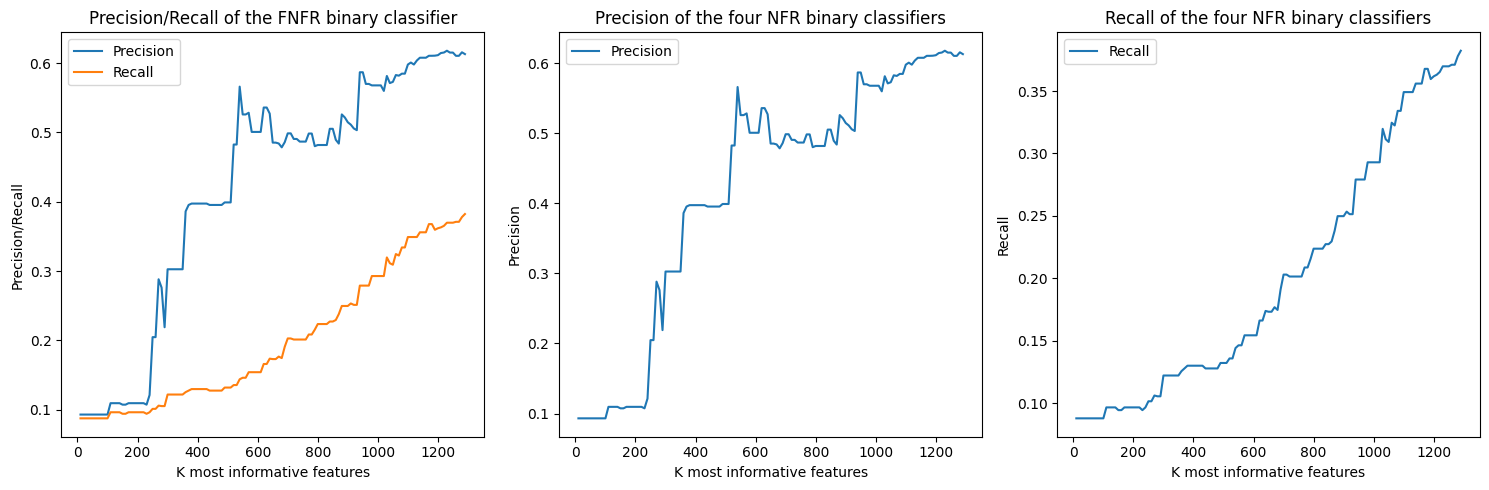

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('normalized.csv')

# 2. Separar os recursos (X) e o alvo (y)
# Use 'RequirementText' as X and '_class_' as y directly
X = df['RequirementText']
y = df['_class_']

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Vectorize text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train) # Fit and transform on training data
X_test = vectorizer.transform(X_test) # Use the same vocabulary as the training data

# 5. Treinar o modelo SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train) # Now X_train and y_train should have consistent shapes

# 6. Fazer previsões
y_pred = svm_model.predict(X_test)

# 7. Calcular métricas
precision = precision_score(y_test, y_pred, average='macro') # Use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')       # Use 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='macro')             # Use 'macro' for multiclass

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# 8. Plotar gráficos para diferentes números de características
# Get number of features from the vectorized training data
num_features = range(10, X_train.shape[1], 10)
precisions = []
recalls = []
f1_scores = []

for k in num_features:
    # Slice vectorized data, not the original DataFrame
    X_train_k = X_train[:, :k]
    X_test_k = X_test[:, :k]

    svm_model.fit(X_train_k, y_train)
    y_pred_k = svm_model.predict(X_test_k)

    # Use 'macro' averaging for multiclass problems
    precisions.append(precision_score(y_test, y_pred_k, average='macro'))
    recalls.append(recall_score(y_test, y_pred_k, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred_k, average='macro'))

# 9. Criar os gráficos
plt.figure(figsize=(15, 5))

# Gráfico (a)
plt.subplot(1, 3, 1)
plt.plot(num_features, precisions, label='Precision')
plt.plot(num_features, recalls, label='Recall')
plt.xlabel('K most informative features')
plt.ylabel('Precision/Recall')
plt.legend()
plt.title('Precision/Recall of the FNFR binary classifier')

# Gráfico (b)
plt.subplot(1, 3, 2)
plt.plot(num_features, precisions, label='Precision')
plt.xlabel('K most informative features')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision of the four NFR binary classifiers')

# Gráfico (c)
plt.subplot(1, 3, 3)
plt.plot(num_features, recalls, label='Recall')
plt.xlabel('K most informative features')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall of the four NFR binary classifiers')

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)